In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
triage = pd.read_csv('triage.csv')
diagnosis = pd.read_csv('diagnosis.csv')

print(triage.shape, 'triage')
display(triage.head())

print(diagnosis.shape, 'diagnosis')
display(diagnosis.head())

(425087, 11) triage


,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"


(899050, 6) diagnosis


,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES


In [5]:
triage.describe()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity
count,4.250870e+05,4.250870e+05,401672.000000,407997.000000,404734.000000,404491.000000,406796.000000,405996.000000,418100.000000
mean,1.500871e+07,3.499735e+07,98.015046,85.079891,17.565521,98.471888,135.395352,81.262126,2.625102
std,2.878486e+06,2.888342e+06,4.008575,18.041690,5.485706,17.040807,240.956408,1057.220031,0.708084
min,1.000003e+07,3.000001e+07,0.100000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.251789e+07,3.249799e+07,97.500000,72.000000,16.000000,97.000000,120.000000,68.000000,2.000000
50%,1.501628e+07,3.499395e+07,98.000000,84.000000,18.000000,99.000000,133.000000,77.000000,3.000000
75%,1.749900e+07,3.750387e+07,98.600000,96.000000,18.000000,100.000000,148.000000,87.000000,3.000000
max,1.999999e+07,3.999996e+07,986.000000,1228.000000,1820.000000,9322.000000,151103.000000,661672.000000,5.000000


In [6]:
diagnosis.describe()

,subject_id,stay_id,seq_num,icd_version
count,8.990500e+05,8.990500e+05,899050.000000,899050.000000
mean,1.500838e+07,3.500095e+07,1.929149,9.507241
std,2.879810e+06,2.888942e+06,1.159710,0.499948
min,1.000003e+07,3.000001e+07,1.000000,9.000000
25%,1.251347e+07,3.250347e+07,1.000000,9.000000
50%,1.502022e+07,3.499600e+07,2.000000,10.000000
75%,1.750406e+07,3.751290e+07,2.000000,10.000000
max,1.999999e+07,3.999996e+07,9.000000,10.000000


In [8]:
triage.isnull().sum()

subject_id            0
stay_id               0
temperature       23415
heartrate         17090
resprate          20353
o2sat             20596
sbp               18291
dbp               19091
pain              12933
acuity             6987
chiefcomplaint       23
dtype: int64

In [9]:
diagnosis.isnull().sum()

subject_id     0
stay_id        0
seq_num        0
icd_code       0
icd_version    0
icd_title      0
dtype: int64

In [11]:
triage.duplicated().sum()

0

In [12]:
diagnosis.duplicated().sum()

0

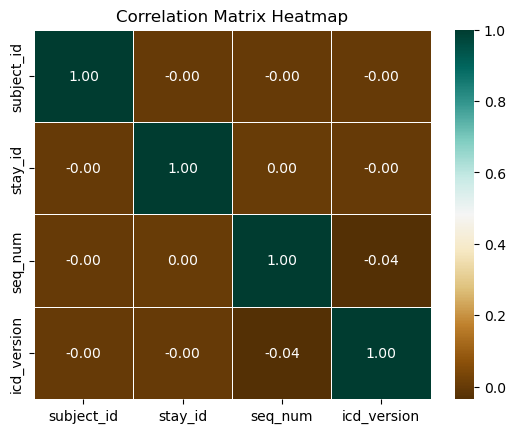

In [21]:
sns.heatmap(diagnosis.corr(), annot=True, cmap='BrBG', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


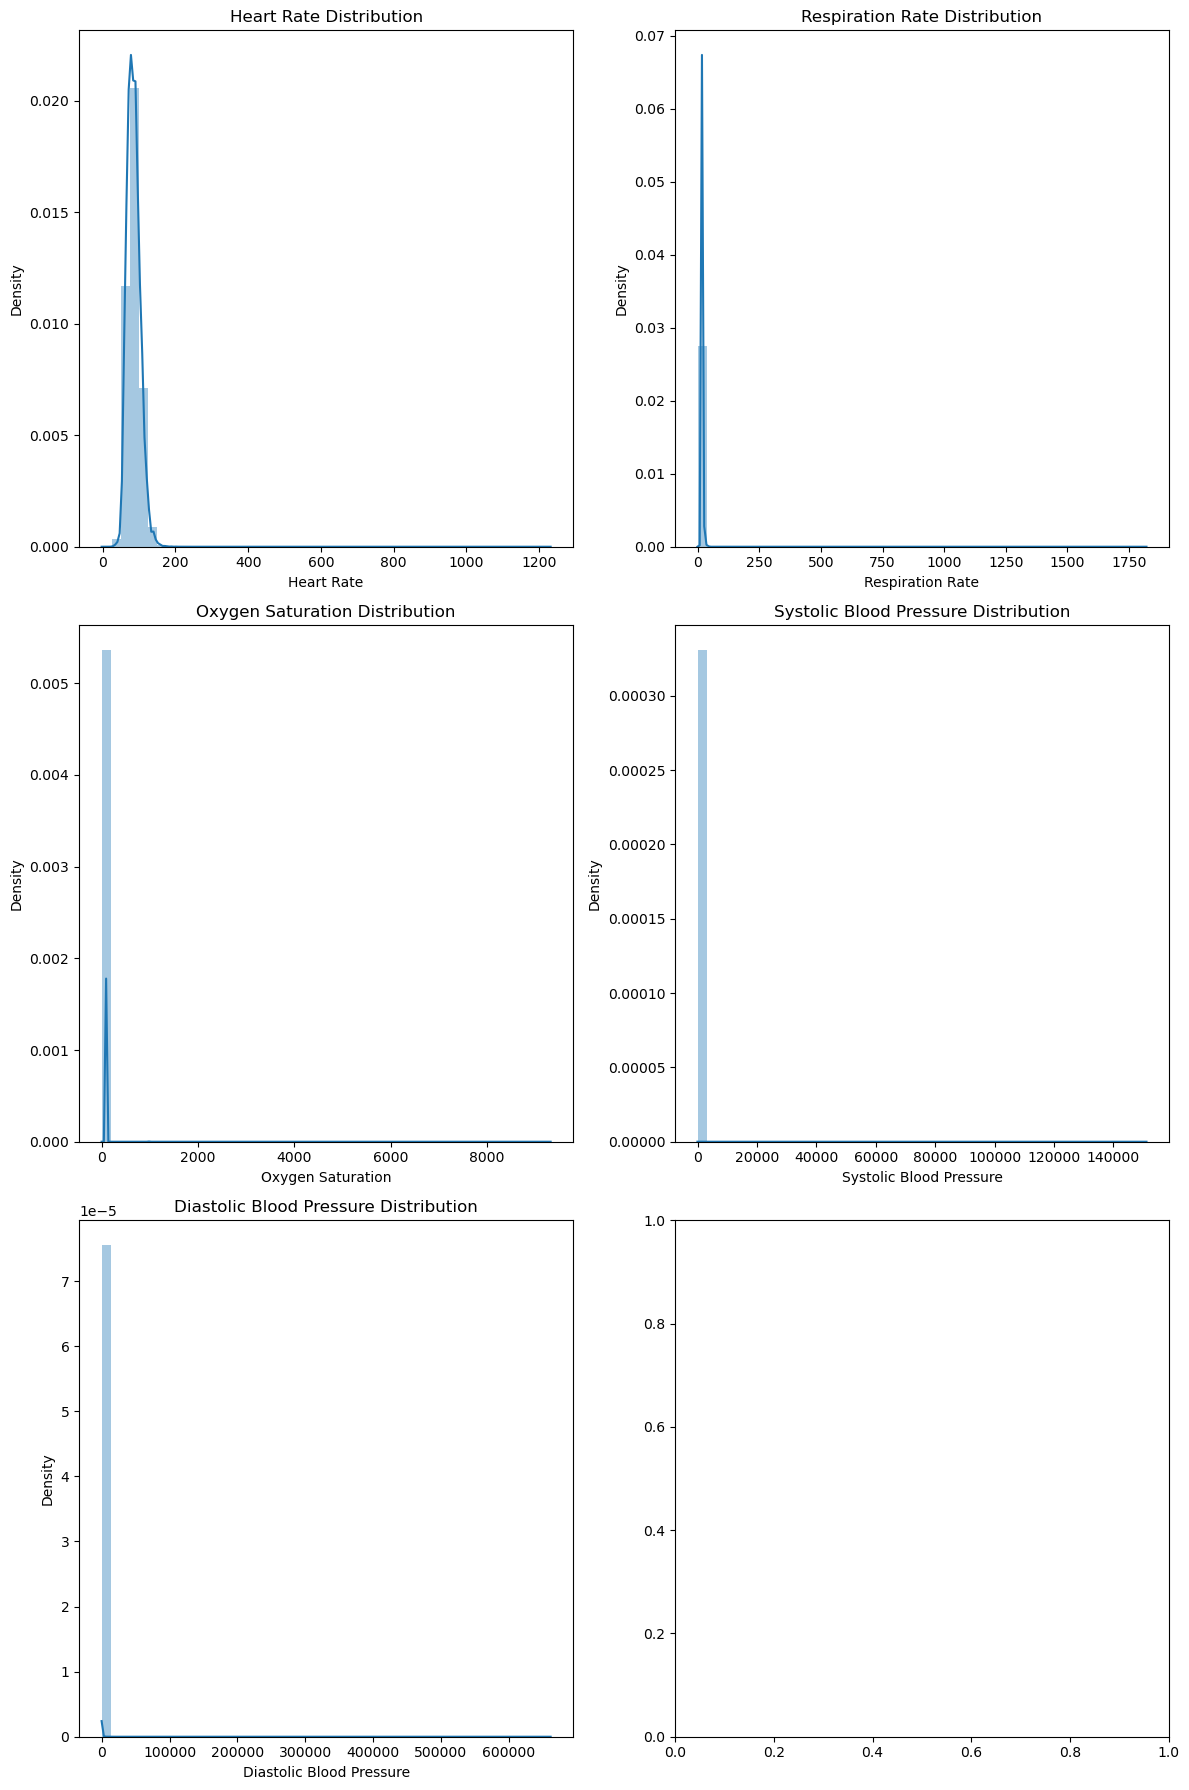

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Plot each distribution
sns.distplot(triage['heartrate'], ax=axes[0, 0])
axes[0, 0].set_title('Heart Rate Distribution')
axes[0, 0].set_xlabel('Heart Rate')

sns.distplot(triage['resprate'], ax=axes[0, 1])
axes[0, 1].set_title('Respiration Rate Distribution')
axes[0, 1].set_xlabel('Respiration Rate')

sns.distplot(triage['o2sat'], ax=axes[1, 0])
axes[1, 0].set_title('Oxygen Saturation Distribution')
axes[1, 0].set_xlabel('Oxygen Saturation')

sns.distplot(triage['sbp'], ax=axes[1, 1])
axes[1, 1].set_title('Systolic Blood Pressure Distribution')
axes[1, 1].set_xlabel('Systolic Blood Pressure')

sns.distplot(triage['dbp'], ax=axes[2, 0])
axes[2, 0].set_title('Diastolic Blood Pressure Distribution')
axes[2, 0].set_xlabel('Diastolic Blood Pressure')


plt.tight_layout()
plt.show()